In [54]:
from src.models import Exponential_Model
from src.criterion import right_censored
from src.load_data import load_datasets
from src.utils import train

from torch.optim import Adam
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter

from tqdm import tqdm

In [2]:
dataset_train,dataset_test = load_datasets(test_size=0.2)

In [3]:
input_dims = dataset_train.tensors[0].shape[1]
output_dim = 1
hidden_dim = [10]
batch_size = 32
print_every = 100
lr = 1e-3

In [4]:
dataloader_train = DataLoader(dataset_train,batch_size=batch_size,shuffle=True)
dataloader_test = DataLoader(dataset_test,batch_size=batch_size,shuffle=False)

dataset_train.tensors[0].shape

torch.Size([286, 14])

In [5]:
clf = Exponential_Model(input_dim=input_dims,hidden_layers=hidden_dim,output_dim=output_dim)

optimizer = Adam(clf.parameters(),lr=1e-3)
criterion = right_censored

In [6]:
epochs,train_loss = train(model=clf,dataloader_train=dataloader_train,optimizer=optimizer,criterion=criterion,print_every=print_every,epochs=1000)

 11%|█         | 109/1000 [00:01<00:12, 71.51it/s]

Epoch 100, LL=2802.614


 21%|██▏       | 213/1000 [00:03<00:10, 74.52it/s]

Epoch 200, LL=2017.228


 31%|███       | 310/1000 [00:04<00:09, 71.87it/s]

Epoch 300, LL=1858.105


 41%|████      | 407/1000 [00:05<00:08, 72.75it/s]

Epoch 400, LL=1761.706


 51%|█████     | 511/1000 [00:07<00:06, 72.10it/s]

Epoch 500, LL=1726.226


 61%|██████    | 607/1000 [00:08<00:05, 65.56it/s]

Epoch 600, LL=1715.077


 71%|███████   | 707/1000 [00:10<00:04, 62.40it/s]

Epoch 700, LL=1711.837


 81%|████████  | 812/1000 [00:11<00:02, 65.40it/s]

Epoch 800, LL=1710.823


 91%|█████████ | 907/1000 [00:13<00:01, 72.29it/s]

Epoch 900, LL=1709.654


100%|██████████| 1000/1000 [00:14<00:00, 69.42it/s]

Epoch 1000, LL=1705.608
Finished Training


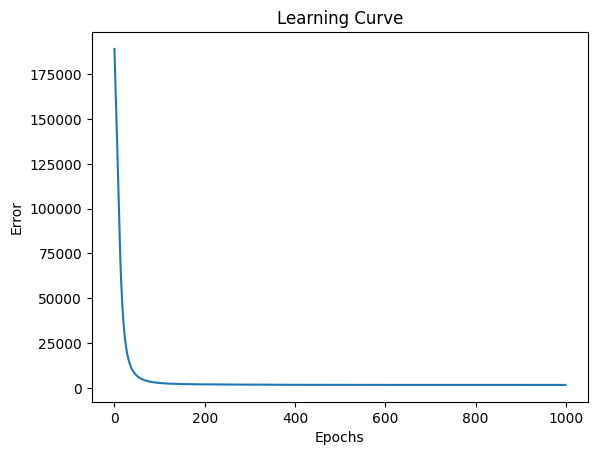

In [7]:
plt.plot(epochs,train_loss)
plt.ylabel("Error"); plt.xlabel("Epochs")
plt.title("Learning Curve")
plt.show()

In [10]:
dataloader_train.dataset.tensors[0]

tensor([[0., 3., 1.,  ..., 0., 1., 0.],
        [2., 4., 0.,  ..., 1., 1., 0.],
        [2., 4., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 4., 1.,  ..., 1., 1., 0.],
        [1., 1., 0.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 1., 0.]])

In [28]:
t = torch.linspace(0,10000,10000)
X,T,E = dataloader_train.dataset.tensors

St_given_x = clf.survival_qdf(X,t)

Text(0.5, 1.0, 'Population Survival Curves')

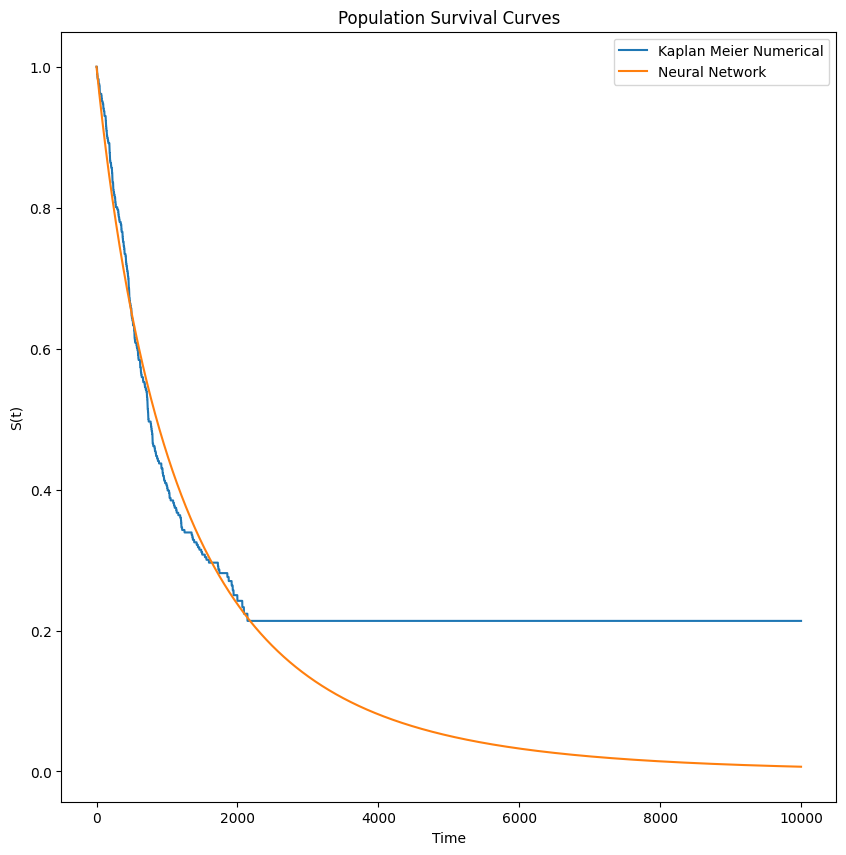

In [44]:
kmf = KaplanMeierFitter()
kmf.fit(durations=T,event_observed=E)
St_kmf = kSt_kmf = kmf.predict(times=t.ravel().numpy())

plt.figure(figsize=(10,10))
plt.plot(t,St_kmf)
plt.plot(t,St_given_x.mean(0))
plt.ylabel("S(t)"); plt.xlabel("Time")
plt.legend(["Kaplan Meier Numerical","Neural Network"])
plt.title("Population Survival Curves")

In [48]:
St_given_x.shape

torch.Size([286, 10000])

100%|██████████| 286/286 [01:20<00:00,  3.57it/s]


Text(0.5, 1.0, 'Population Survival Curves')

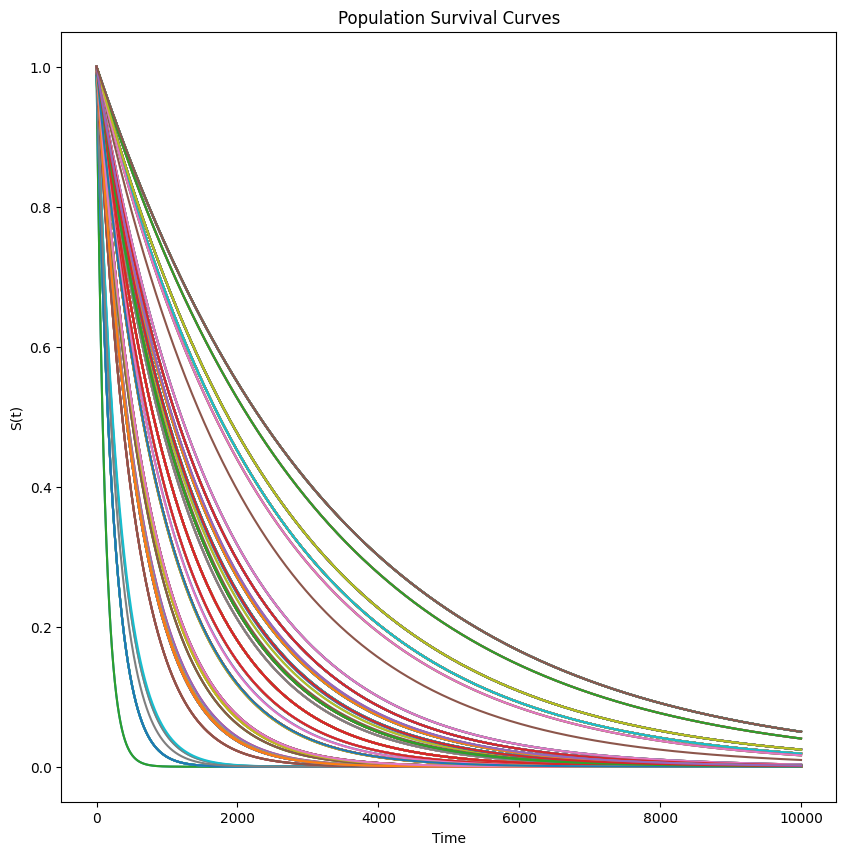

In [59]:
plt.figure(figsize=(10,10))
for Sti in tqdm(St_given_x):
    plt.plot(t,Sti)
plt.ylabel("S(t)"); plt.xlabel("Time")
plt.title("Individual Survival Curves")